In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [2]:
train = pd.read_csv('train_final.csv')
test = pd.read_csv('test_final.csv')

### Splitting our datasets

In [4]:
train_X = train.drop(['Weekly_Sales', 'Date'], axis=1)
train_y = train['Weekly_Sales']

test_X = test.drop('Date', axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 16), (421570,), (115064, 16))

In [5]:
train_X.head()

,Unnamed: 0,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,0,1,1,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
1,1,1,2,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
2,2,1,3,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
3,3,1,4,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
4,4,1,5,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5


In [6]:
test_X.head()

,Unnamed: 0,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,0,1,1,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
1,1,1,2,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
2,2,1,3,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
3,3,1,4,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
4,4,1,5,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2


In [7]:
train_X = train_X.drop(train_X.columns[0], axis=1)
test_X = test_X.drop(test_X.columns[0], axis=1)

In [9]:
train_X.shape, train_y.shape, test_X.shape

((421570, 15), (421570,), (115064, 15))

### What type of models will we use?

Let's first take a quick look at what our prediction vector looks like:

<AxesSubplot:>

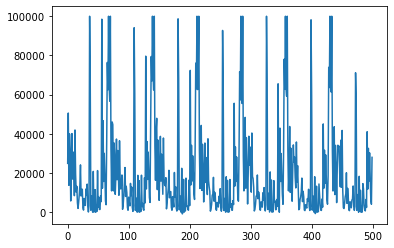

In [10]:
train_y[:500].plot()

#### Since it is not a continously increasing or therfore decreasing number, we will be treating this analysis as a regression.

### Linear Regression